In [254]:
import pandas as pd
results = pd.read_csv('results.csv')

In [257]:
results = results[results["Exp"] != "exp_bank_parallel__2000t_mahlanobis_alpha_4_decay_0.05_multi_exp_more_logs_v2"]

In [258]:
for exp in results[results["Dataset"] == "MNIST"]["Exp"]:
    print(exp)

exp_bank_parallel__2000t_eps_greedy_schedule_0.2_decay_0.05_multi_exp_more_logs_v2
exp_bank_parallel__2000t_greedy_bad_decay_0.05_multi_exp_more_logs_v2
exp_bank_parallel__2000t_pseudolabel_decay_0.05_multi_exp_more_logs_v2
exp_bank_parallel__2000t_mahlanobis_alpha_4_rerundecay_0.05_multi_exp_more_logs_v2


In [259]:
import numpy as np
import matplotlib.pyplot as plt

STD_GAP = 0.5
ALPHA = 0.1
LINEWIDTH = 3.5
LINESTYLE = "dashed"
COLORS = {"NeurUCB": "black", "EG": "red", "Greedy": "blue", "PLOT": "green"}

def monotone(regret):
    new_regret = []
    prev = -1000
    for i, elem in enumerate(regret):
        if prev > elem:
            new_regret.append(prev)
        else:
            new_regret.append(elem)
            prev = elem
    return new_regret

def parse_df(dataset, methods):
    for exp in results[results["Dataset"] == dataset]["Exp"]:
        print(exp)
    results[results["Dataset"] == dataset]
    regret = np.array(list(results[results["Dataset"] == dataset]["Regret"].apply(eval)))
    stds = np.array(list(results[results["Dataset"] == dataset]["Regret_STD"].apply(eval)))
    res_meth = zip(methods, regret, stds)
    return res_meth


def plot_dataset(res_meth, dataset):
    for (method, regret, std) in res_meth:
        result = monotone(regret)
        x = [x*10 for x in range(len(result))]
        plt.scatter(x, result, label=method, color=COLORS[method], alpha=0.2)
        plt.fill_between(
            x,
            result - STD_GAP * std,
            result + STD_GAP * std,
            alpha=ALPHA,
            color=COLORS[method]
        )
    plt.title(f"{dataset}", fontsize=14)
    plt.xlabel("Timesteps")
    plt.ylabel("Cumulative Regret")
    plt.legend()
    plt.show()
  

exp_bank_parallel__2000t_eps_greedy_schedule_0.2_decay_0.05_multi_exp_more_logs_v2
exp_bank_parallel__2000t_greedy_bad_decay_0.05_multi_exp_more_logs_v2
exp_bank_parallel__2000t_pseudolabel_decay_0.05_multi_exp_more_logs_v2
exp_bank_parallel__2000t_mahlanobis_alpha_4_rerundecay_0.05_multi_exp_more_logs_v2


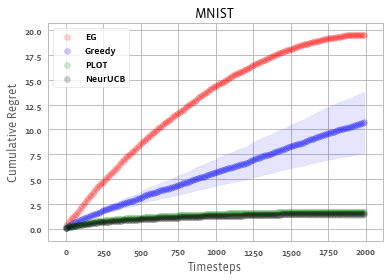

In [261]:
# methods = ["NeurUCB", "EG", "Greedy", "PLOT"]
methods = ["EG", "Greedy", "PLOT", "NeurUCB"]
res_meth = parse_df("MNIST", methods)
plot_dataset(res_meth, "MNIST")

exp_bank_parallel__2000t_eps_greedy_schedule_0.2_decay_0.05_multi_exp_more_logs_v2
exp_bank_parallel__2000t_greedy_bad_decay_0.05_multi_exp_more_logs_v2
exp_bank_parallel__2000t_pseudolabel_decay_0.05_multi_exp_more_logs_v2
exp_bank_parallel__2000t_mahlanobis_alpha_4_rerundecay_0.05_multi_exp_more_logs_v2


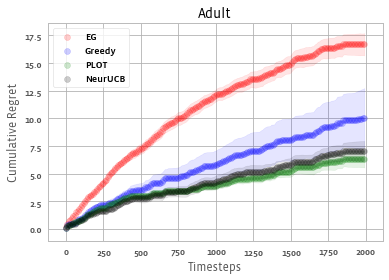

In [263]:
methods = ["EG", "Greedy", "PLOT", "NeurUCB"]
res_meth = parse_df("Adult", methods)
plot_dataset(res_meth, "Adult")

exp_bank_parallel__2000t_eps_greedy_schedule_0.2_decay_0.05_multi_exp_more_logs_v2
exp_bank_parallel__2000t_greedy_bad_decay_0.05_multi_exp_more_logs_v2
exp_bank_parallel__2000t_pseudolabel_decay_0.05_multi_exp_more_logs_v2
exp_bank_parallel__2000t_mahlanobis_alpha_4_rerundecay_0.05_multi_exp_more_logs_v2


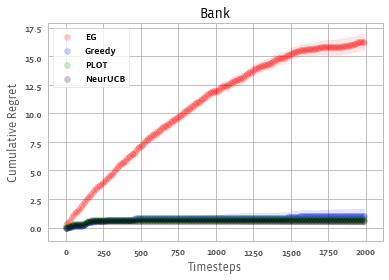

In [265]:
methods = ["EG", "Greedy", "PLOT", "NeurUCB"]
res_meth = parse_df("Bank", methods)
plot_dataset(res_meth, "Bank")

exp_bank_parallel__2000t_mahlanobis_alpha_4_decay_0.05_multi_exp_more_logs_v2
exp_bank_parallel__2000t_eps_greedy_schedule_0.2_decay_0.05_multi_exp_more_logs_v2
exp_bank_parallel__2000t_pseudolabel_decay_0.05_multi_exp_more_logs_v2


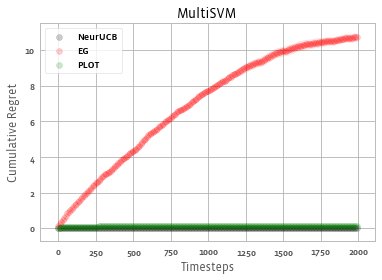

In [135]:
methods = ["NeurUCB", "EG", "PLOT"]
COLORS = {"NeurUCB": "black", "EG": "red", "Greedy": "blue", "PLOT": "green"}
res_meth = parse_df("MultiSVM", methods)
plot_dataset(res_meth, "MultiSVM")

In [128]:
dataset = "MultiSVM"
for exp in results[results["Dataset"] == dataset]["Exp"]:
    print(exp)

exp_bank_parallel__2000t_mahlanobis_alpha_4_decay_0.05_multi_exp_more_logs_v2
exp_bank_parallel__2000t_eps_greedy_schedule_0.2_decay_0.05_multi_exp_more_logs_v2
exp_bank_parallel__2000t_pseudolabel_decay_0.05_multi_exp_more_logs_v2


In [234]:
import numpy as np

import json
with open("adult_fpr.json", 'r') as f:
    adult_breakdown = json.load(f)
    
# def process_results(results):
#     pos_results = [x[0] for x in results[0]]
#     neg_results = [x[1] for x in results[0]]
#     accepted_neg = np.array([nr[0] for nr in neg_results]).cumsum()
#     true_neg = np.array([nr[1] for nr in neg_results]).cumsum()
#     accepted_pos = np.array([pr[0] for pr in pos_results]).cumsum()
#     true_pos = np.array([pr[1] for pr in pos_results]).cumsum()
#     return accepted_pos / true_pos, accepted_neg / true_neg

<ipython-input-169-e4766bc0814d>:8: RuntimeWarning:

invalid value encountered in true_divide



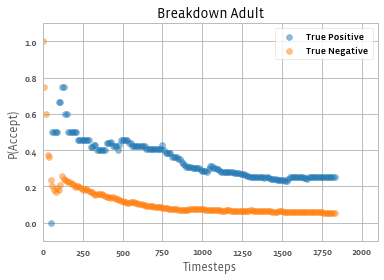

In [235]:
# def plot(cum_accepts, dataset):
#     x = [x*10 for x in range(len(cum_accepts[0]))]
#     plt.scatter(x, cum_accepts[0], label="True Positive", alpha=0.5)
#     plt.scatter(x, cum_accepts[1], label="True Negative", alpha=0.5)
#     plt.xlabel("Timesteps")
#     plt.ylabel("P(Accept)")
#     plt.xlim(0, 2100)
#     plt.ylim(-0.1, 1.1)
#     plt.legend()
#     plt.title(f"Breakdown {dataset}", fontsize=14)
#     plt.show()

# cum_accepts_adult = process_results(breakdowns[4])
# plot(cum_accepts_adult, "Adult")
# # plot(cum_accepts_mnist, "MNIST")
# # cum_accepts_adult_2 = process_results(adult_breakdown_robust)
# # plot(cum_accepts_adult_2, "Adult")

In [310]:
def process_results(results):
    pos_results = [x[0] for x in results]
    neg_results = [x[1] for x in results]
    accepted_neg = np.array([nr[0] for nr in neg_results]).cumsum()
    true_neg = np.array([nr[1] for nr in neg_results]).cumsum()
    accepted_pos = np.array([pr[0] for pr in pos_results]).cumsum()
    true_pos = np.array([pr[1] for pr in pos_results]).cumsum()
    return accepted_pos / true_pos, accepted_neg / true_neg

def process_2(cum_breakdowns):
    cum_breakdowns_trunc = []
    for x in cum_breakdowns:
        pos = x[0]
        neg = x[1]
        cum_breakdowns_trunc.append([pos[:180], neg[:180]])
    # cum_breakdowns_trunc = [x[:180] for x in cum_breakdowns]
    cum_breakdowns_trunc
    pos = []
    for x in cum_breakdowns_trunc:
        pos.append(x[0])

    neg = []
    for x in cum_breakdowns_trunc:
        neg.append(x[1])
    print(np.stack(pos).shape)
    stacked_pos = np.stack(pos)
    stacked_neg = np.stack(neg)
    return np.mean(stacked_pos, axis=0), np.mean(stacked_neg, axis=0), np.std(stacked_pos, axis=0), np.std(stacked_neg, axis=0)
    # return sum(pos)/len(cum_breakdowns), sum(neg)/len(cum_breakdowns)

def plot(cum_accepts, dataset):
    x = [x*10 for x in range(len(cum_accepts[0]))]
    plt.scatter(x, cum_accepts[0], label="True Positive", alpha=0.5)
    plt.scatter(x, cum_accepts[1], label="True Negative", alpha=0.5)
    plt.fill_between(x, cum_accepts[0] - 0.5 * cum_accepts[2], cum_accepts[0] + 0.5 * cum_accepts[2], alpha=0.1)
    plt.fill_between(x, cum_accepts[1] - 0.5 * cum_accepts[3], cum_accepts[1] + 0.5 * cum_accepts[3], alpha=0.1)
    plt.xlabel("Timesteps")
    plt.ylabel("P(Accept)")
    plt.xlim(0, 2100)
    plt.ylim(0.0, 1.0)
    plt.legend()
    plt.title(f"{dataset}", fontsize=14)
    plt.show()

(5, 180)


<ipython-input-310-be62c8ba7bf6>:8: RuntimeWarning:

invalid value encountered in true_divide



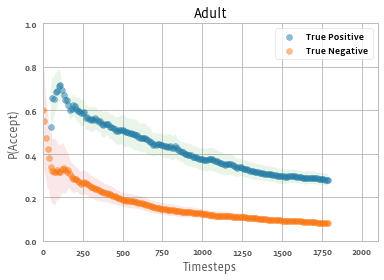

In [314]:
cum_breakdowns = [process_results(np.array(breakdown)) for breakdown in adult_breakdown]
plot(process_2(cum_breakdowns), "Adult")

(5, 180)


<ipython-input-310-be62c8ba7bf6>:8: RuntimeWarning:

invalid value encountered in true_divide



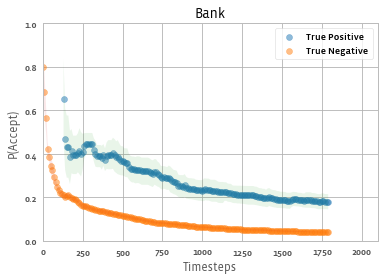

In [312]:
import json
with open("bank_fpr.json", 'r') as f:
    bank_breakdown = json.load(f)
cum_breakdowns = [process_results(np.array(breakdown)) for breakdown in bank_breakdown]
plot(process_2(cum_breakdowns), "Bank")

(5, 180)


<ipython-input-310-be62c8ba7bf6>:8: RuntimeWarning:

invalid value encountered in true_divide



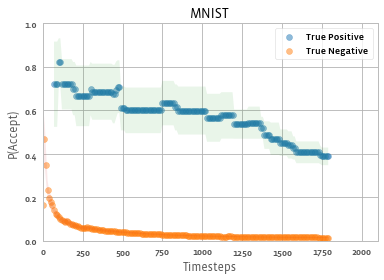

In [319]:
import json
with open("mnist_fpr.json", 'r') as f:
    mnist_breakdown = json.load(f)
cum_breakdowns = [process_results(np.array(breakdown)) for breakdown in mnist_breakdown]
plot(process_2(cum_breakdowns), "MNIST")

In [326]:
cum_breakdowns[0][0]

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [333]:
[x[0] for x in mnist_breakdown[0]]

[[3, 3],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [1, 1],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 